In [12]:
import tal
import os

# TODO: if you want to follow this tutorial,
# you need to have rendered the scene using the "tal render nlos-z" shell command
# See README.md for more information
# Write here   vvvvvvvvvvvvv   the path to your rendered scene
root = 'nlos-z/YYYYMMDD-HHMM'

data = tal.io.read_capture(os.path.join(root, 'nlos-z.hdf5'))

In [14]:
# because this is a test scene, we know the hidden geometry
# is located at Z = 1
# this volume_xyz is coplanar to the relay wall (rw) at Z=1
volume_xyz = tal.reconstruct.get_volume_project_rw(data, depths=[1.0,])
print(volume_xyz.shape)

(64, 64, 1, 3)


tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3


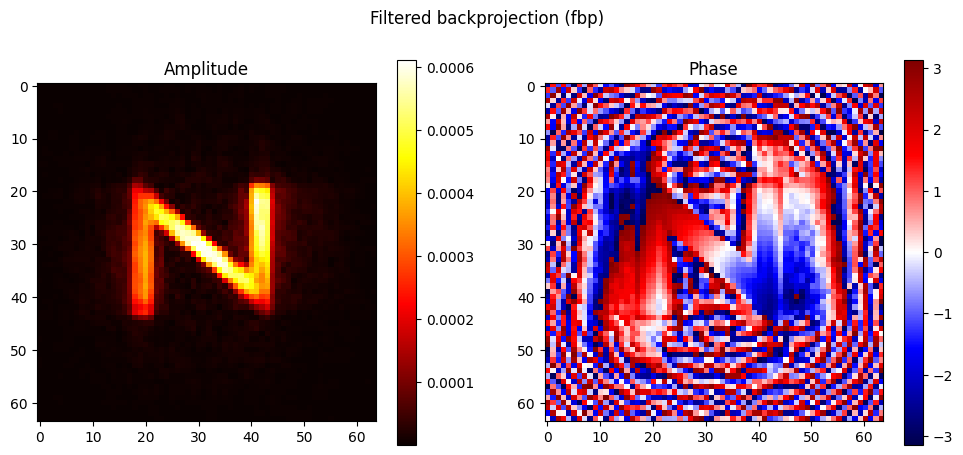

In [15]:
# Here is a reconstruction using filtered backprojection
# It is a bit slow (takes a few minutes) because it is single-threaded
# The filtering applied, by default, is the phasor field filter with the
# wl_mean and wl_sigma specified
H_1 = tal.reconstruct.fbp.solve(data,
                                wl_mean=0.06, wl_sigma=0.06,
                                volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)
tal.plot.amplitude_phase(H_1, title='Filtered backprojection (fbp)')

tal.resources: Using 8 processes out of 8 and downscale 8
tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.resources: Using 8 processes out of 8 and downscale 8


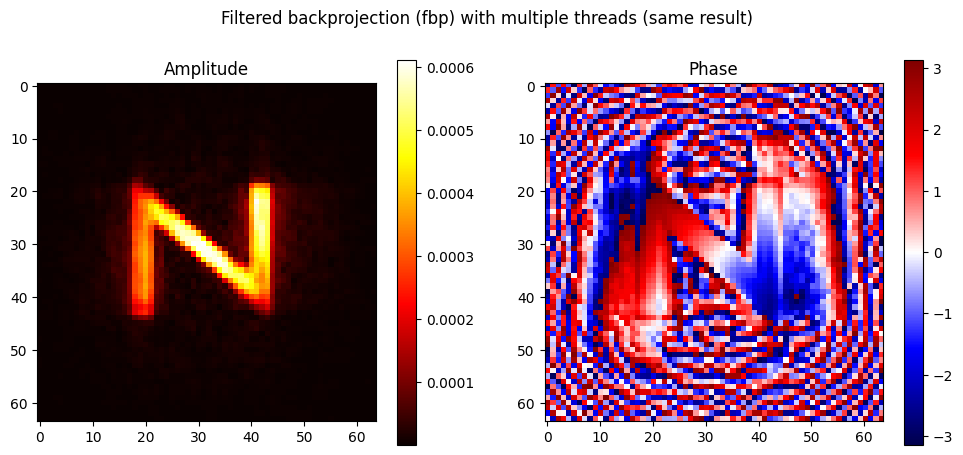

In [17]:
# Using tal.resources you can set the number of threads
#with tal.resources(4):  # 4 threads
with tal.resources('max'):  # max number of threads
    H_1 = tal.reconstruct.fbp.solve(data,
                                    wl_mean=0.06, wl_sigma=0.06,
                                    volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)
    tal.plot.amplitude_phase(H_1, title='Filtered backprojection (fbp) with multiple threads (same result)')

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for convolutions. Other algorithms (e.g. tal.reconstruct.pf_dev) should also log that it is being used.
tal.reconstruct.pf_dev: Using convolutions optimization
tal.reconstruct.pf_dev: Using wavelengths from 0.0400m to 0.1200m


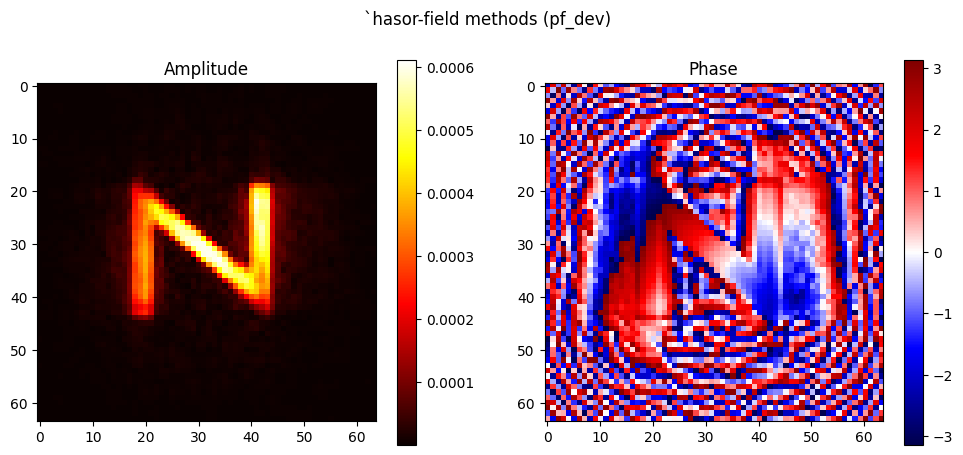

In [18]:
# When your volume_xyz is coplanar to the relay wall,
# pf_dev implements the optimization in the Phasor Field Diffraction paper
# which can be even faster
H_1 = tal.reconstruct.pf_dev.solve(data,
                                   wl_mean=0.06, wl_sigma=0.06,
                                   volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)
tal.plot.amplitude_phase(H_1, title='Phasor-field methods (pf_dev)')

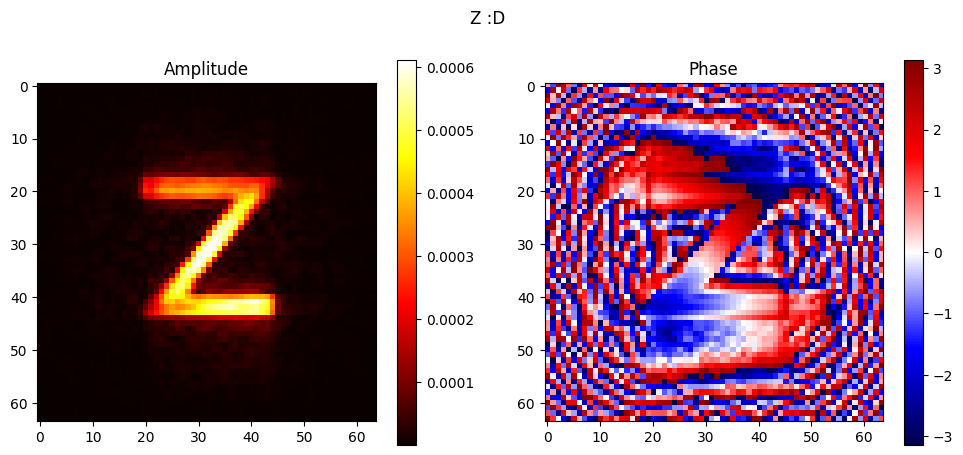

In [21]:
# Note that the Z is not well oriented. To see it as you would expect
import numpy as np
tal.plot.amplitude_phase(np.fliplr(np.squeeze(H_1).T), title='Z')